### Objective
A hospital in the province of Greenland has been trying to improve its care conditions by looking at historic survival of the patients. They tried looking at their data but could not identify the main factors leading to high survivals.

You are the best data scientist in Greenland and they've hired you to solve this problem. Now you are responsible for developing a model that will predict the chances of survival of a patient after 1 year of treatment (Survived_1_year).

### Data Description
The dataset contains the patient records collected from a hospital in Greenland. 

The "Survived_1_year" column is a target variable which has binary entries (0 or 1).

Survived_1_year == 0, implies that the patient did not survive after 1 year of treatment
Survived_1_year == 1, implies that the patient survived after 1 year of treatment


Features:
    
    ID_Patient_Care_Situation: Care situation of a patient during treatment
    
    Diagnosed_Condition: The diagnosed condition of the patient
    
    ID_Patient: Patient identifier number
    
    Treatment_with_drugs: Class of drugs used during treatment
    
    Survived_1_year: If the patient survived after one year (0 means did not survive; 1 means survived)
    
    Patient_Age: Age of the patient
    
    Patient_Body_Mass_Index: A calculated value based on the patient’s weight, height, etc.
    
    Patient_Smoker: If the patient was a smoker or not
    
    Patient_Rural_Urban: If the patient stayed in Rural or Urban part of the country
    
    Previous_Condition: Condition of the patient before the start of the treatment (This variable is splitted into 8 columns - A, B, C, D, E, F, Z and Number_of_prev_cond. A, B, C, D, E, F and Z are the previous conditions of the patient. Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. If the patient didn't have that condition, it is 0 and same for other conditions. If a patient has previous condition as A and C , columns A and C will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0 respectively. The column Number_of_prev_cond will have entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case.).

### Loading Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

pd.set_option("max_rows",1000000)
pd.set_option("max_columns",100)


Using TensorFlow backend.


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_advc.csv')

In [3]:
df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,16201,47,8433,DX2,60,21.655523,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
1,9421,3,2972,DX6,2,28.852743,NO,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0
2,16205,7,8608,Dx6,20,26.179725,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
3,5582,31,10074,dx6,8,22.638945,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
4,20880,43,7462,dx1,53,21.326131,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [4]:
print('Number of rows:',df.shape[0])
print('Number of cols:',df.shape[1])

Number of rows: 25079
Number of cols: 18


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25079 entries, 0 to 25078
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  25079 non-null  int64  
 1   Diagnosed_Condition        25079 non-null  int64  
 2   Patient_ID                 25079 non-null  int64  
 3   Treated_with_drugs         25071 non-null  object 
 4   Patient_Age                25079 non-null  int64  
 5   Patient_Body_Mass_Index    25079 non-null  float64
 6   Patient_Smoker             25079 non-null  object 
 7   Patient_Rural_Urban        25079 non-null  object 
 8   Patient_mental_condition   25079 non-null  object 
 9   A                          23723 non-null  float64
 10  B                          23723 non-null  float64
 11  C                          23723 non-null  float64
 12  D                          23723 non-null  float64
 13  E                          23723 non-null  flo

In [6]:
df.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,25079.000000,25079.000000,25079.000000,25079.000000,25079.000000,23723.000000,23723.000000,23723.000000,23723.000000,23723.000000,23723.000000,23723.000000,23723.000000,25079.000000
mean,16509.925396,26.382631,6237.758523,33.193548,23.439952,0.894111,0.136028,0.183409,0.083716,0.396240,0.054420,0.000337,1.748261,0.634316
std,9536.958469,15.096967,3603.338849,19.507617,3.778849,0.307702,0.342826,0.387009,0.276968,0.489126,0.226849,0.018361,0.770324,0.481631
min,1.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8220.000000,13.000000,3125.000000,16.000000,20.205050,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16466.000000,26.000000,6228.000000,33.000000,23.369168,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24784.000000,40.000000,9356.500000,50.000000,26.730785,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33013.000000,52.000000,12514.000000,142.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


### Data Imputation and Data Cleaning

In [7]:
missing = df.isnull().sum()

In [8]:
missing[missing>0]

Treated_with_drugs        8
A                      1356
B                      1356
C                      1356
D                      1356
E                      1356
F                      1356
Z                      1356
Number_of_prev_cond    1356
dtype: int64

In [9]:
df['Treated_with_drugs'] = df['Treated_with_drugs'].str.upper() #converting all to upper to maintain uniformity
df['Patient_Smoker'] = df['Patient_Smoker'].str.upper()

In [10]:
df['Treated_with_drugs']= df['Treated_with_drugs'].fillna(df['Treated_with_drugs'].mode()[0])

In [11]:
cols = ['A','B','C','D','E','F','Z']  #imputing with median since it is categorical
for i in cols:
    df[i] = df[i].fillna(df[i].median())

In [12]:
missing = df.isnull().sum()
missing[missing>0]

Number_of_prev_cond    1356
dtype: int64

In [13]:
for i in range(len(df)): #imputing with addition of above cols
    df['Number_of_prev_cond'][i] = df['A'][i]+df['B'][i]+df['C'][i]+df['D'][i]+df['E'][i]+df['F'][i]+df['Z'][i]

In [14]:
missing = df.isnull().sum()
missing[missing>0]

Series([], dtype: int64)

In [15]:
df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,16201,47,8433,DX2,60,21.655523,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
1,9421,3,2972,DX6,2,28.852743,NO,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0
2,16205,7,8608,DX6,20,26.179725,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
3,5582,31,10074,DX6,8,22.638945,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
4,20880,43,7462,DX1,53,21.326131,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [16]:
df.Treated_with_drugs.unique()

array(['DX2', 'DX6', 'DX6 ', 'DX1', 'DX1 DX3 DX4 ', 'DX5 ', 'DX2 ',
       'DX2 DX5 ', 'DX3 DX5', 'DX1 DX3', 'DX3 DX4 ', 'DX3', 'DX2 DX3',
       'DX1 ', 'DX4', 'DX1 DX2 DX3 DX5', 'DX5', 'DX4 ', 'DX3 ',
       'DX3 DX4 DX5 ', 'DX1 DX3 ', 'DX2 DX5', 'DX1 DX5', 'DX2 DX4',
       'DX2 DX3 ', 'DX3 DX5 ', 'DX2 DX3 DX4 ', 'DX4 DX5 ', 'DX1 DX5 ',
       'DX1 DX3 DX5', 'DX1 DX4 ', 'DX4 DX5', 'DX1 DX2 ', 'DX1 DX3 DX5 ',
       'DX1 DX4', 'DX1 DX2 DX4 DX5 ', 'DX1 DX2', 'DX1 DX3 DX4',
       'DX1 DX2 DX3', 'DX1 DX4 DX5 ', 'DX3 DX4', 'DX3 DX4 DX5',
       'DX1 DX2 DX4', 'DX2 DX4 ', 'DX1 DX4 DX5', 'DX1 DX2 DX5',
       'DX2 DX4 DX5', 'DX2 DX3 DX5 ', 'DX2 DX3 DX5', 'DX1 DX2 DX4 ',
       'DX1 DX2 DX3 ', 'DX1 DX2 DX4 DX5', 'DX2 DX3 DX4', 'DX2 DX4 DX5 ',
       'DX1 DX2 DX3 DX4', 'DX1 DX3 DX4 DX5', 'DX1 DX2 DX5 ',
       'DX1 DX2 DX3 DX4 ', 'DX2 DX3 DX4 DX5', 'DX1 DX2 DX3 DX4 DX5',
       'DX1 DX3 DX4 DX5 ', 'DX2 DX3 DX4 DX5 ', 'DX1 DX2 DX3 DX5 ',
       'DX1 DX2 DX3 DX4 DX5 '], dtype=object)

In [17]:
df['DX1'] = 0
df['DX2'] = 0
df['DX3'] = 0
df['DX4'] = 0
df['DX5'] = 0
df['DX6'] = 0

In [18]:
def checki(string, sub_str,i): 
    if (string.find(sub_str) == -1): 
        df['DX1'][i] = 0
    else: 
        df['DX1'][i] = 1

        
for i in range(len(df)):
    string = df.Treated_with_drugs[i]
    sub_str = 'DX1'
    checki(string,sub_str,i) 
    
def checki(string, sub_str,i): 
    if (string.find(sub_str) == -1): 
        df['DX2'][i] = 0
    else: 
        df['DX2'][i] = 1
            

for i in range(len(df)):
    string = df.Treated_with_drugs[i]
    sub_str = 'DX2'
    checki(string,sub_str,i) 
    
def checki(string, sub_str,i): 
    if (string.find(sub_str) == -1): 
        df['DX3'][i] = 0
    else: 
        df['DX3'][i] = 1
            

for i in range(len(df)):
    string = df.Treated_with_drugs[i]
    sub_str = 'DX3'
    checki(string,sub_str,i) 
    
def checki(string, sub_str,i): 
    if (string.find(sub_str) == -1): 
        df['DX4'][i] = 0
    else: 
        df['DX4'][i] = 1
            

for i in range(len(df)):
    string = df.Treated_with_drugs[i]
    sub_str = 'DX4'
    checki(string,sub_str,i) 
    
def checki(string, sub_str,i): 
    if (string.find(sub_str) == -1): 
        df['DX5'][i] = 0
    else: 
        df['DX5'][i] = 1
            

for i in range(len(df)):
    string = df.Treated_with_drugs[i]
    sub_str = 'DX5'
    checki(string,sub_str,i) 

def checki(string, sub_str,i): 
    if (string.find(sub_str) == -1): 
        df['DX6'][i] = 0
    else: 
        df['DX6'][i] = 1
            
for i in range(len(df)):
    string = df.Treated_with_drugs[i]
    sub_str = 'DX6'
    checki(string,sub_str,i) 

In [19]:
df.Patient_Smoker.value_counts()

NO             10511
YES             7833
NO              3891
YES             2710
YESS             100
YESS              26
CANNOT SAY         5
CANNOT SAY         3
Name: Patient_Smoker, dtype: int64

In [20]:
df.Patient_Smoker = df.Patient_Smoker.replace('YESS','YES')
df.Patient_Smoker = df.Patient_Smoker.replace('YESS ','YES')
df.Patient_Smoker = df.Patient_Smoker.replace('YES ','YES')
df.Patient_Smoker = df.Patient_Smoker.replace('NO ','NO')
df.Patient_Smoker = df.Patient_Smoker.replace('CANNOT SAY ','CANNOT SAY')
df.Patient_Smoker = df.Patient_Smoker.replace('CANNOT SAY','NO')

In [21]:
df.Patient_Smoker.value_counts()

NO     14410
YES    10669
Name: Patient_Smoker, dtype: int64

In [22]:
df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year,DX1,DX2,DX3,DX4,DX5,DX6
0,16201,47,8433,DX2,60,21.655523,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0,0,0,0
1,9421,3,2972,DX6,2,28.852743,NO,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0,0,0,0,0,0,1
2,16205,7,8608,DX6,20,26.179725,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,0,0,0,0,1
3,5582,31,10074,DX6,8,22.638945,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,0,0,0,1
4,20880,43,7462,DX1,53,21.326131,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,0,0,0


In [23]:
pharma_data = df.drop(['ID_Patient_Care_Situation','Patient_ID','Treated_with_drugs'],axis = 1)

In [24]:
pharma_data.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year,DX1,DX2,DX3,DX4,DX5,DX6
0,47,60,21.655523,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0,0,0,0
1,3,2,28.852743,NO,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0,0,0,0,0,0,1
2,7,20,26.179725,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,0,0,0,0,1
3,31,8,22.638945,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,0,0,0,1
4,43,53,21.326131,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,0,0,0


### Exploratory Data Analysis

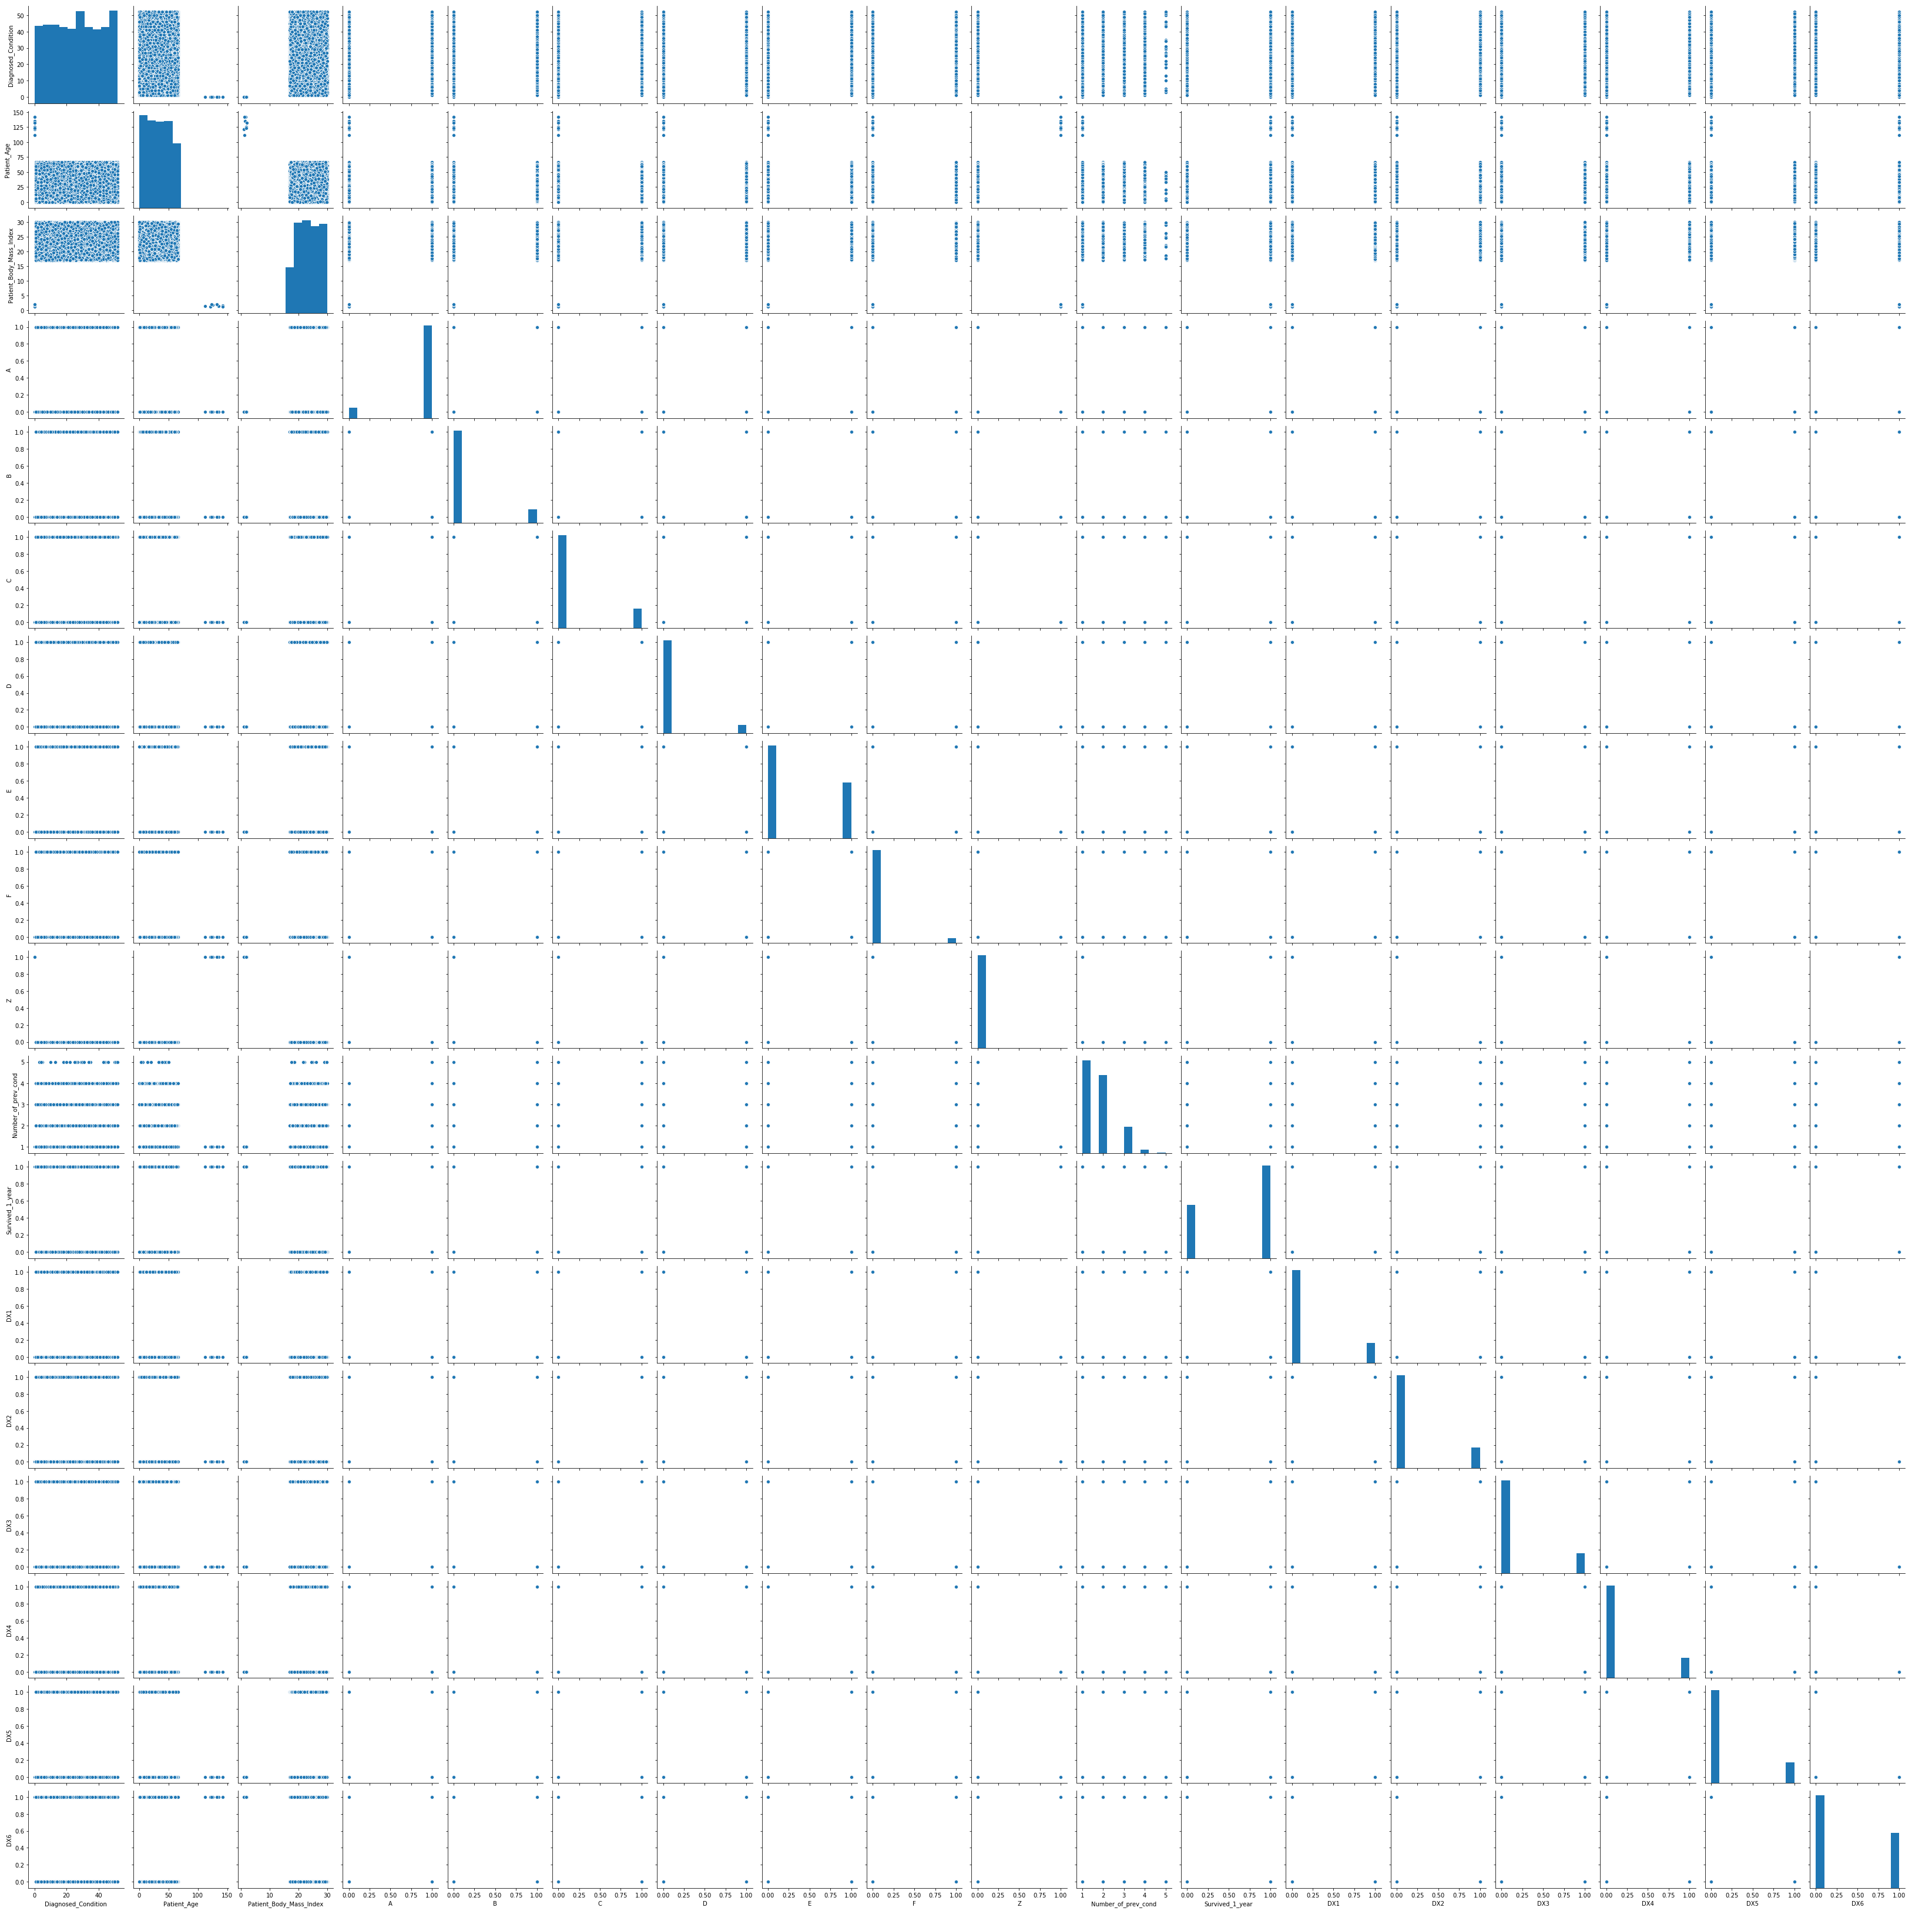

In [25]:
sns.pairplot(pharma_data)

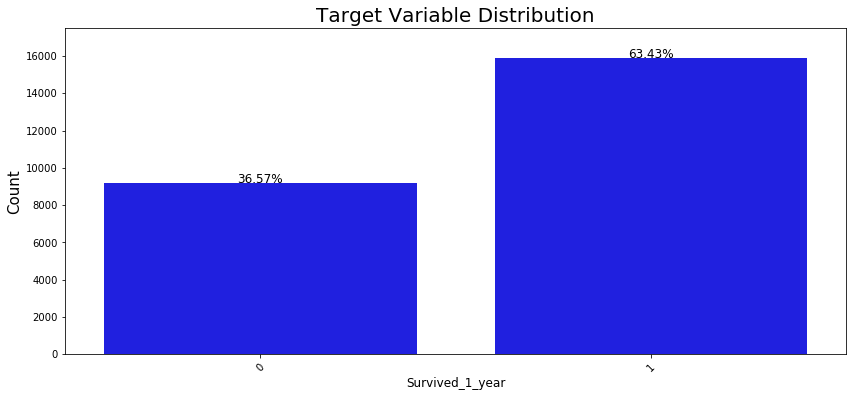

In [26]:

total = len(pharma_data)

plt.figure(figsize = (14,6))

g = sns.countplot(x="Survived_1_year", data=pharma_data, 
                  color='blue')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Survived_1_year", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Target Variable Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)

plt.show()

We can see that the dataset is imbalanced.

    0 -> Doesnt survive after 1 year of treatment
    1 -> Survives after 1 year of treatment
 

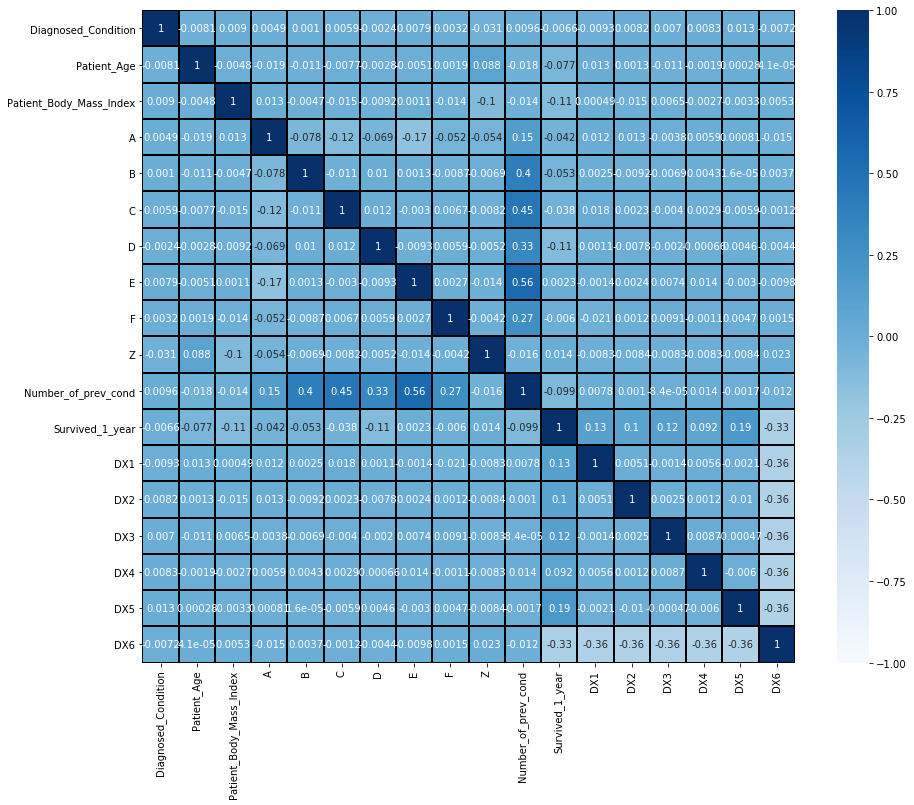

In [27]:
plt.figure(figsize=(15,12))
sns.heatmap(pharma_data.corr(),annot=True,cmap='Blues',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar=True)
plt.show()

We cant see much correlation of the independent variables with the dependent variable.

But there is correlation between independent variables such as DX6 and number_of_prev_cond.

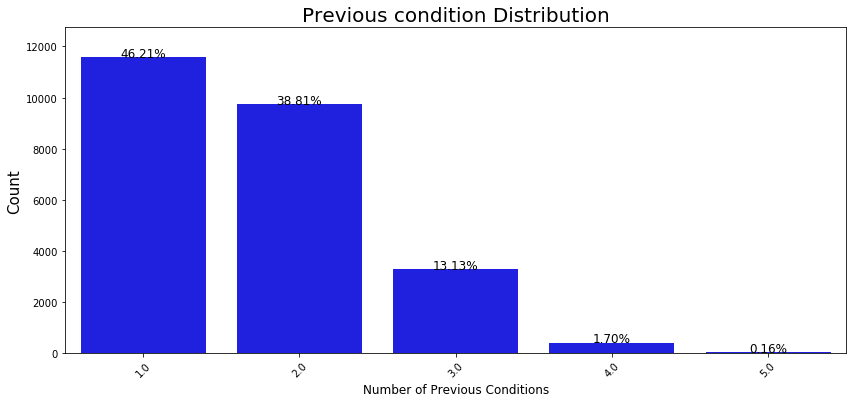

In [28]:
plt.figure(figsize = (14,6))

g = sns.countplot(x="Number_of_prev_cond", data=pharma_data, 
                  color='blue')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Number of Previous Conditions", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Previous condition Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)

plt.show()

85% of the patients have had atmost 2 conitions in the past.

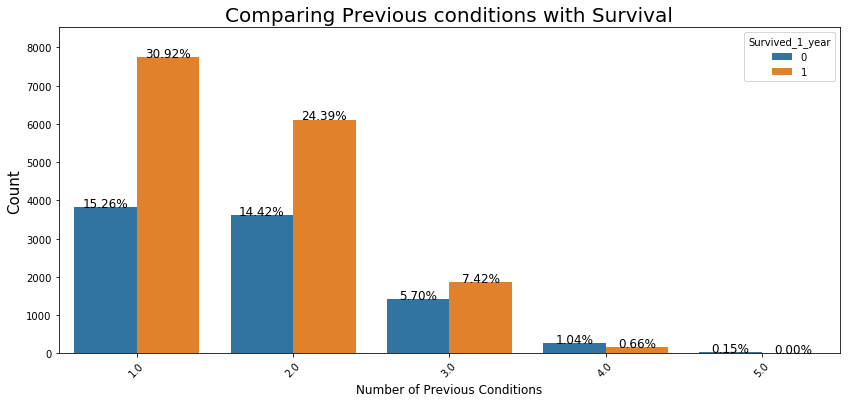

In [171]:
plt.figure(figsize = (14,6))

g = sns.countplot(x="Number_of_prev_cond", data=pharma_data,hue='Survived_1_year')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Number of Previous Conditions", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Comparing Previous conditions with Survival", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)
plt.show()

The chances of survival for people with upto 3 conditions is higher.

Beyond 3 conditions the patients have less chances of surviving.

None of the patients with 5 previous conditions have survived.

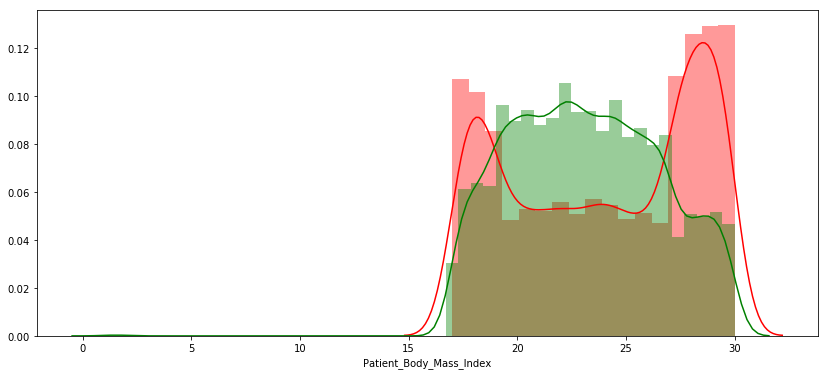

In [30]:
plt.figure(figsize=(14,6))
sns.distplot(pharma_data.Patient_Body_Mass_Index[pharma_data.Survived_1_year ==0],color='Red')
sns.distplot(pharma_data.Patient_Body_Mass_Index[pharma_data.Survived_1_year ==1],color='Green')
plt.show()

Patients with low and high BMI are at risk of not surviving.

Patients have to maintain their BMI to stay healthy.

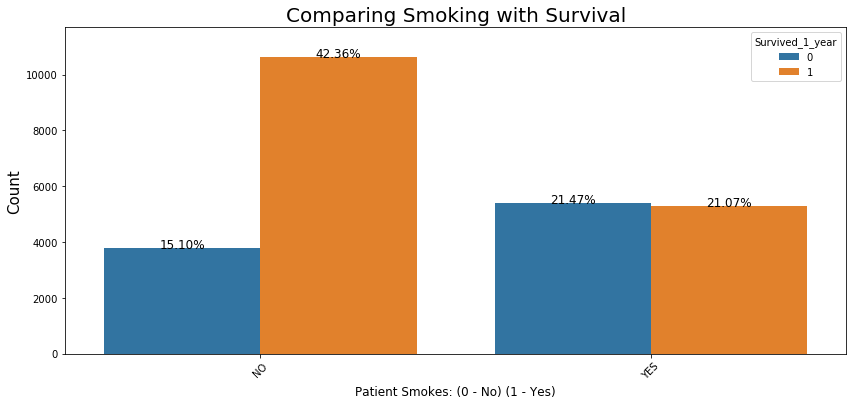

In [31]:
plt.figure(figsize = (14,6))

g = sns.countplot(x="Patient_Smoker", data=pharma_data,hue='Survived_1_year')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Patient Smokes: (0 - No) (1 - Yes)", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Comparing Smoking with Survival", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)

plt.show()

There is a higher chance of surviving for the patients who do not smoke.

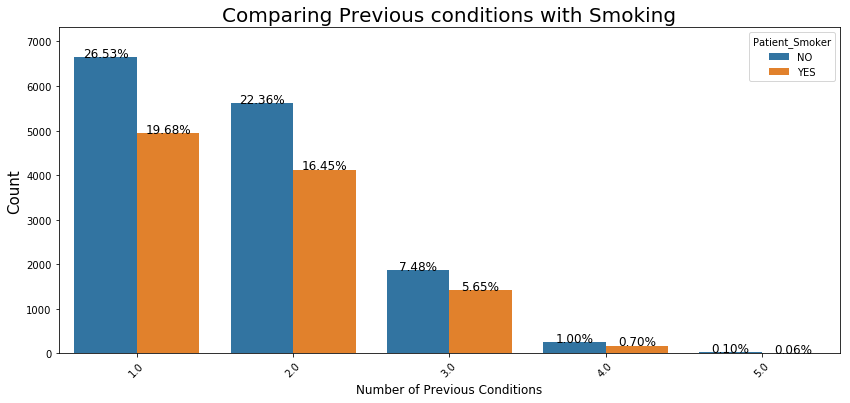

In [32]:
plt.figure(figsize = (14,6))

g = sns.countplot(x="Number_of_prev_cond", data=pharma_data,hue='Patient_Smoker')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Number of Previous Conditions", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Comparing Previous conditions with Smoking", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)

plt.show()

Smokers have had a very high number of previous conditions while comparing with non smokers.

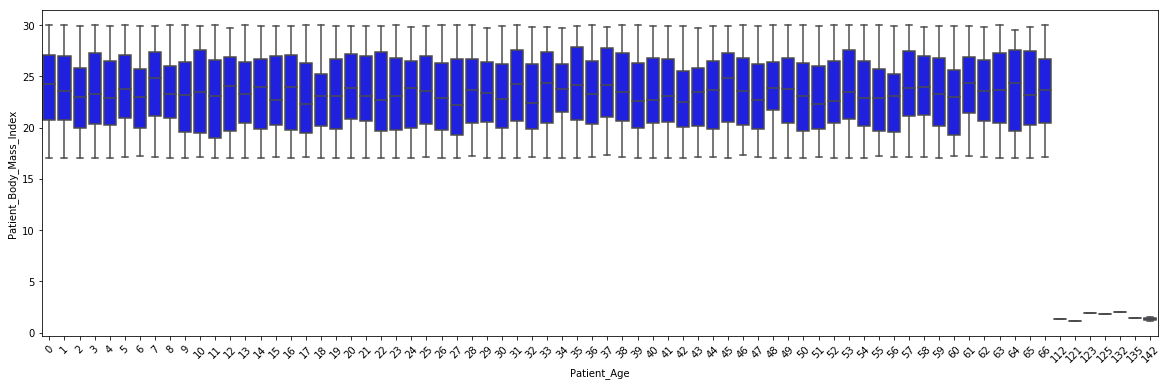

In [33]:
plt.figure(figsize = (20,6))
g = sns.boxplot(x=pharma_data.Patient_Age,y = pharma_data.Patient_Body_Mass_Index,color = 'blue')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()

We can see through this plot that there are a few patients whose age is greater than 110. Lets explore those patients.

In [34]:
pharma_data[pharma_data.Patient_Age >100].sort_values(by = 'Patient_Age')

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year,DX1,DX2,DX3,DX4,DX5,DX6
2137,0,112,1.2925,NO,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0,0,0,1
13192,0,121,1.0893,NO,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0,0,0,1
19669,0,123,1.9290,NO,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0,0,0,1
14574,0,125,1.8282,NO,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0,0,0,1
6257,0,132,1.9896,NO,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0,0,0,1
1239,0,135,1.4606,NO,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0,0,0,1
3346,0,142,1.5701,NO,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0,0,0,1
12863,0,142,1.1450,NO,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0,0,0,1


We can see that there are patients with age 112 upto 142 and their BMI's are really very low,close to 1.5. These rows can be false and can hinder with the model training. We should drop these rows.

In [35]:
pharma_data = pharma_data[pharma_data.Patient_Age <100]

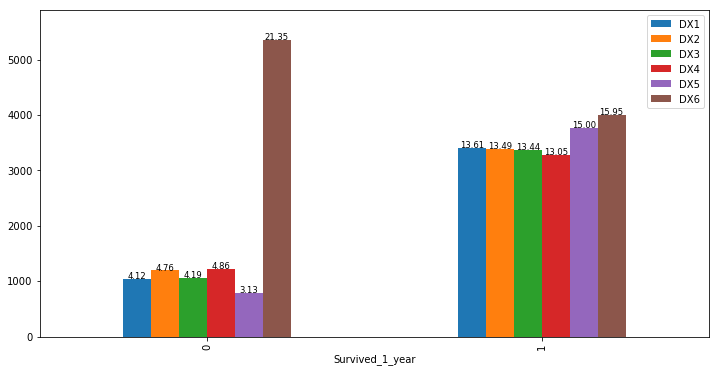

In [173]:
g = pharma_data.groupby('Survived_1_year')['DX1','DX2','DX3','DX4','DX5','DX6'].sum().plot(kind='bar',figsize=(12,6))
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total*100),
            ha="center", fontsize=8.5) 
g.set_ylim(0, max(sizes) * 1.10)

plt.show()

We can see that a large number of patients had to take DX6 drug. More than 50% of those patients could not survive. 
This can be one of the reasons for the deaths of patients.

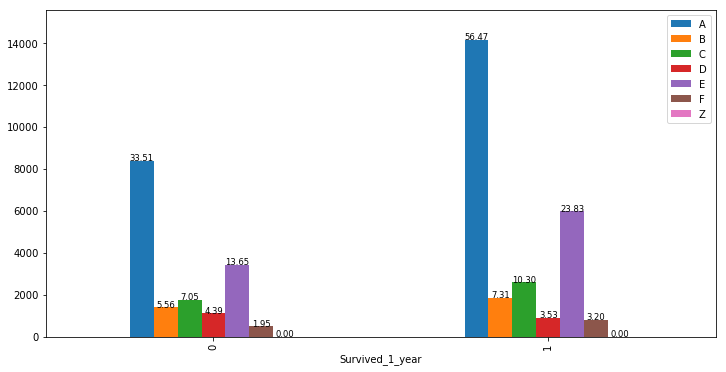

In [37]:
g=pharma_data.groupby('Survived_1_year')['A','B','C','D','E','F','Z'].sum().plot(kind='bar',figsize=(12,6))
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total*100),
            ha="center", fontsize=8.5) 
g.set_ylim(0, max(sizes) * 1.10)
plt.show()

A very high number of patients had the condition 'A'.


note: The above numbers on top of the bar are in percentage.

### Data Wrangling

In [38]:
pharma_data = pharma_data.drop('Patient_mental_condition',axis = 1) #since all patients are stable

In [39]:
pharma_data.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year,DX1,DX2,DX3,DX4,DX5,DX6
0,47,60,21.655523,NO,URBAN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0,0,0,0
1,3,2,28.852743,NO,RURAL,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0,0,0,0,0,0,1
2,7,20,26.179725,NO,RURAL,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,0,0,0,0,1
3,31,8,22.638945,NO,RURAL,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,0,0,0,1
4,43,53,21.326131,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,0,0,0


In [40]:
cat_cols = ['Patient_Smoker','Patient_Rural_Urban']

In [41]:
le = LabelEncoder()

In [42]:
for i in cat_cols:
    pharma_data[i] = le.fit_transform(pharma_data[i])

In [43]:
pharma_data.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year,DX1,DX2,DX3,DX4,DX5,DX6
0,47,60,21.655523,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0,0,0,0
1,3,2,28.852743,0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0,0,0,0,0,0,1
2,7,20,26.179725,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,0,0,0,0,1
3,31,8,22.638945,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,0,0,0,1
4,43,53,21.326131,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,0,0,0


### Baseline Model

In [44]:
y = pharma_data.Survived_1_year
X = pharma_data.drop('Survived_1_year',axis = 1)

In [45]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [46]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [47]:
f1_score(y_test,y_pred)

0.7981025793062556

In [48]:
accuracy_score(y_test,y_pred)

0.7283967030045201

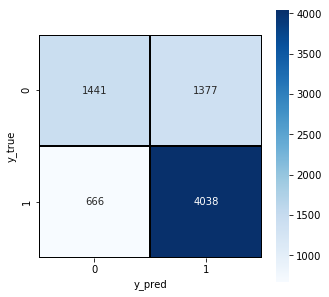

In [49]:
cm1 = confusion_matrix(y_test, y_pred)

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm1,annot = True,cmap='Blues',linewidths=1,linecolor='k',square=True,mask=False,fmt = ".0f",cbar=True,ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

### Model Improvement

In [50]:
y = pharma_data.Survived_1_year
X = pharma_data.drop('Survived_1_year',axis = 1)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [51]:
knc = KNeighborsClassifier()
gnb = GaussianNB()
dtc = DecisionTreeClassifier(random_state=42)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
ada = AdaBoostClassifier(base_estimator=rfc,random_state=42)
etc = ExtraTreesClassifier(random_state=42)

In [52]:
clfs = {'KNN' : knc, 'NB': gnb, 'DT': dtc, 'LR': lrc, 'RF': rfc,'XGB':xgb,'ADA':ada,'ET':etc}

In [53]:
def train_classifier(clf, X_train, y_train):      #function to train all the models
    clf.fit(X_train, y_train)
    
def predict_labels(clf, X_test):                 # function to predict all the models
    return (clf.predict(X_test))

In [54]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v,X_train,y_train)
    pred = predict_labels(v,X_test)
    pred_scores.append((k, f1_score(y_test,pred)))

In [55]:
scores = pd.DataFrame(pred_scores,columns = ['Classifier','F1 Score'])
scores = scores.set_index('Classifier')
scores

,F1 Score
Classifier,
KNN,0.793247
NB,0.749256
DT,0.839221
LR,0.797470
RF,0.858537
XGB,0.867683
ADA,0.858585
ET,0.845456


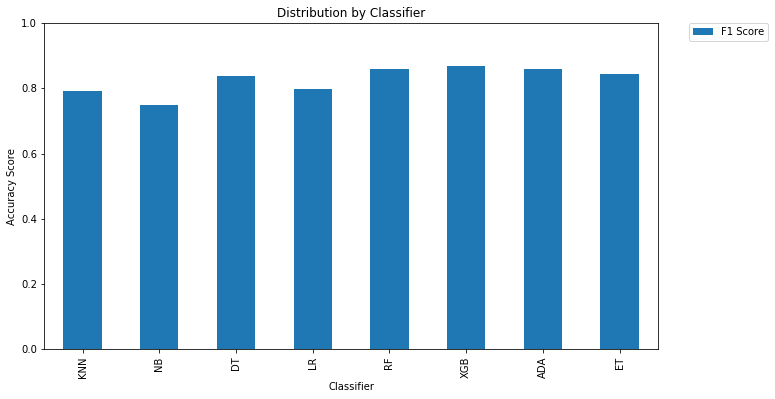

In [56]:
scores.plot(kind='bar', ylim=(0,1.0), figsize=(11,6), align='center')
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

We can see that the XGBoost model gives the best F1-Score so we proceed with improving that model.

In [57]:
train_classifier(xgb,X_train,y_train)
y_pred = predict_labels(xgb,X_test)

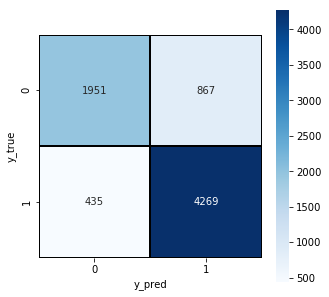

In [58]:
cm1 = confusion_matrix(y_test, y_pred)

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm1,annot = True,cmap='Blues',linewidths=1,linecolor='k',square=True,mask=False,fmt = ".0f",cbar=True,ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

### Feature Importance/ Selection

In [59]:
feat = []
num = []

for i in range(19):
    feat.append(X_train.columns[i])
    num.append(xgb.feature_importances_[i])
feat_imp = pd.DataFrame(data =num,columns=['importance'],index=feat)

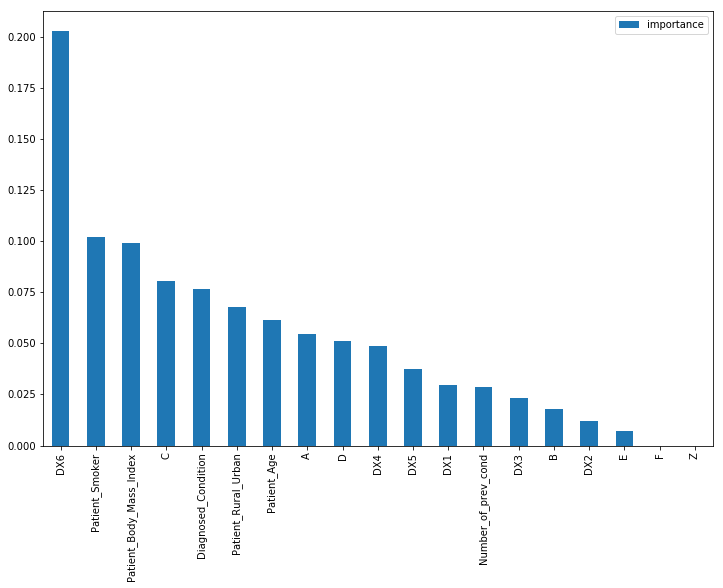

In [60]:
feat_imp.sort_values(by = 'importance',ascending=False).plot(kind = 'bar',figsize=(12,8))

In [122]:
y = pharma_data.Survived_1_year
X = pharma_data.drop(['Survived_1_year','F','Z','E'],axis = 1)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [123]:
train_classifier(xgb,X_train,y_train)
y_pred = predict_labels(xgb,X_test)

In [124]:
f1_score(y_test,y_pred) #removing weak features to decrease dimensionality

0.8673645695700783

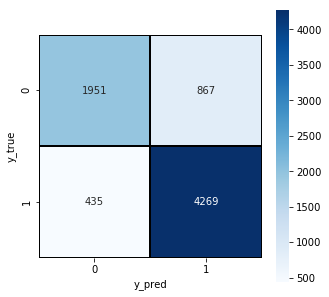

In [107]:
cm1 = confusion_matrix(y_test, y_pred)

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm1,annot = True,cmap='Blues',linewidths=1,linecolor='k',square=True,mask=False,fmt = ".0f",cbar=True,ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

### Hyper-parameter Tunning

In [65]:
param_test1 = {
 'max_depth':range(1,10,1),
 'min_child_weight':range(1,10,1),
 'n_estimators':[100,150,200], 
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(random_state=42,n_jobs=-1), 
 param_grid = param_test1, scoring='f1',n_jobs=-1, cv=5)
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(1, 10), 'min_child_weight': range(1, 10), 'n_estimators': [100, 150, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [66]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 150},
 0.8783163013626598)

In [159]:
y = pharma_data.Survived_1_year
X = pharma_data.drop(['Survived_1_year','F','Z','E'],axis = 1)


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

xgb_best = XGBClassifier(max_depth=4,min_child_weight=3,n_estimators=150, random_state= 42,n_jobs=-1)



In [160]:
train_classifier(xgb_best,X_train,y_train)
y_pred = predict_labels(xgb_best,X_test)

In [161]:
f1_score(y_test,y_pred)

0.8767095115681235

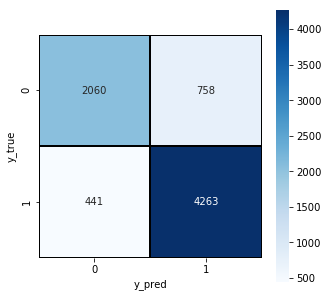

In [162]:
cm1 = confusion_matrix(y_test, y_pred)

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm1,annot = True,cmap='Blues',linewidths=1,linecolor='k',square=True,mask=False,fmt = ".0f",cbar=True,ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Hyper-parameter tunning has helped us improve the F1-score slightly. 

In [163]:
from sklearn.metrics import roc_auc_score,roc_curve

In [164]:
roc_auc_score(y_test,y_pred)

0.8186324520936835

### SMOTE

In [129]:
y = pharma_data.Survived_1_year
X = pharma_data.drop(['Survived_1_year','F','Z','E'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
sm = SMOTE(random_state=42)

X_train_res,y_train_res = sm.fit_sample(X_train,y_train)


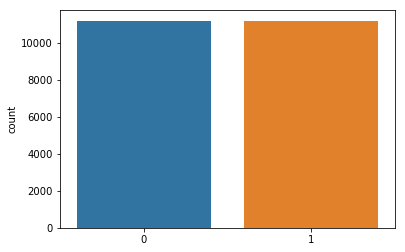

In [130]:
sns.countplot(y_train_res)
plt.show()

In [131]:
xgb_best = XGBClassifier(max_depth=4,min_child_weight=3,n_estimators=150, random_state= 42,n_jobs=-1)

In [132]:
train_classifier(xgb_best,X_train_res,y_train_res)
y_pred = predict_labels(xgb_best,np.array(X_test))

In [133]:
f1_score(y_test,y_pred)

0.8753550015777849

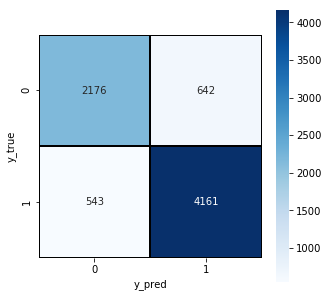

In [134]:
cm1 = confusion_matrix(y_test, y_pred)

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm1,annot = True,cmap='Blues',linewidths=1,linecolor='k',square=True,mask=False,fmt = ".0f",cbar=True,ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

The F1 score post balancing is comparable to the previous model.

### Conclusion

The XGBoost model is the best performing model. The F1 score improves after hyper parameter tunning the model. 
The F1 Score of 87.67 is a very good score. The model yet misclassifies alot so it cannot be taken into the production phase. We have to improve the F1 score further by various advanced classification techniques.

Yet the Exploratory data analysis has given us good insights that could actually help increase the survival chances of the patients. 

Those insights are:
    
       1. Controlling the BMI by keeping it in between 19 and 26.
       2. Reducing the smoking habits of the patients.
       3. Being extra cautious with patients with condition 'A'.
       4. Finding alternatives to the 'DX6' drug.